# Evaluación 3
Patiy Li Yang

## Ejercicio 1: Borde de China

In [5]:
import os
import geopandas as gpd
from  fiona import listlayers

ChinaMaps_3415="https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion3_GeoDF-Operaciones/raw/main/maps/China3415/ChinaMaps_3415.gpkg"
China3415 = gpd.read_file(ChinaMaps_3415,layer="countries")
China3415

#China3415 es un multipolígono:

,COUNTRY,geometry
0,China,"MULTIPOLYGON (((156893.444 400575.264, 163317...."


In [6]:
China3415_border = China3415.boundary
type(China3415_border)

geopandas.geoseries.GeoSeries

In [9]:
China3415_border_gdf = China3415_border.to_frame()
China3415_border_gdf

,0
0,"MULTILINESTRING ((156893.444 400575.264, 16331..."


## Ejercicio 2: Subdivisiones administrativas de China
[Subdivisiones administrativas de China](https://data.humdata.org/dataset/cod-ab-chn) (1: provincias, 2: prefecturas)

In [11]:
China_provinces=gpd.read_file(os.path.join("maps","chn_adm_ocha_2020_shp","chn_admbnda_adm1_ocha_2020.shp"))
China_prefectures=gpd.read_file(os.path.join("maps","chn_adm_ocha_2020_shp","chn_admbnda_adm2_ocha_2020.shp"))

Ambas subdivisiones administrativas presentan CRSs no proyectados:

In [14]:
China_provinces.crs,China_prefectures.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

Cambiando los CRSs por unos proyectados y que coincidan con los de China3415 para que puedan ser graficados en un mismo mapa:

In [15]:
China_provinces3415 = China_provinces.to_crs(3415)
China_prefectures3415 = China_prefectures.to_crs(3415) 

# Ejercicio 3: Plantas generadoras de energía en China
Datos a emplear: [Global Power Plant Database](https://datasets.wri.org/dataset/globalpowerplantdatabase)

Es una base de datos que contiene datos geográficos de plantas generadoras de energía de diferentes países. Se creará un GeoDataFrame que incluya solo los datos para China.

In [16]:
import pandas as pd
PowerPlants=pd.read_csv(os.path.join("data","global_power_plant_database.csv"), dtype={'other_fuel3': 'object'})

China_PowerPlants=PowerPlants[PowerPlants["country"]=="CHN"]
China_PowerPlants=China_PowerPlants.loc[:,["name","gppd_idnr","capacity_mw","latitude","longitude","primary_fuel"]]
China_PowerPlants.reset_index(drop=True, inplace=True)
China_PowerPlants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4235 non-null   object 
 1   gppd_idnr     4235 non-null   object 
 2   capacity_mw   4235 non-null   float64
 3   latitude      4235 non-null   float64
 4   longitude     4235 non-null   float64
 5   primary_fuel  4235 non-null   object 
dtypes: float64(3), object(3)
memory usage: 198.6+ KB


In [27]:
China_PowerPlants_gpd=gpd.GeoDataFrame(data=China_PowerPlants.copy(),
                 geometry=gpd.points_from_xy(x=China_PowerPlants.longitude,
                                             y=China_PowerPlants.latitude),
                 crs=4326)

#Cambiando los CRSs por unos proyectados y que coincidan con los de China3415:
China3415_PowerPlants=China_PowerPlants_gpd.to_crs(3415)
China3415_PowerPlants

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geometry
0,APP Zhenjiang Jindong Mill power station,WRI1075566,290.0,32.1944,119.6998,Coal,POINT (1047199.039 1756451.972)
1,Aba Minjiang River Jiangseba,WRI1072501,128.0,31.4837,103.6032,Hydro,POINT (-502906.088 1699174.246)
2,Abag Banner Huiteng Liang Phase 1,WRI1072152,49.0,43.3500,115.9000,Wind,POINT (667016.352 3043941.695)
3,Ahai,WRI1000457,4750.0,27.3488,100.5061,Hydro,POINT (-840063.803 1260296.817)
4,Aksai A,WKS0070352,20.0,38.9690,94.4210,Solar,POINT (-1280489.125 2632839.774)
...,...,...,...,...,...,...,...
4230,Zibo Hongda power station,WRI1075796,140.0,36.7833,118.0500,Coal,POINT (875586.490 2274790.240)
4231,Zipingpu,WRI1000497,760.0,31.0400,103.5700,Hydro,POINT (-509361.257 1649549.022)
4232,Ziqiang,WRI1072262,18.0,26.6661,106.1219,Hydro,POINT (-286731.133 1147119.352)
4233,Zouxian power station,WRI1072548,4540.0,35.3256,116.9261,Coal,POINT (774432.721 2105090.082)


Se crearán capas para clasificar las plantas acorde a la fuente primaria de energía que emplean:

In [25]:
China_PowerPlants3415["primary_fuel"].value_counts()

primary_fuel
Solar         1318
Hydro          947
Coal           946
Wind           835
Gas            170
Nuclear         12
Oil              5
Geothermal       2
Name: count, dtype: int64

In [28]:
from folium import LayerControl

m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Coal'].explore(color="red",name='Coal',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Gas'].explore(m=m, color="blue",name='Gas',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Geothermal'].explore(m=m, color="green",name='Geothermal',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Hydro'].explore(m=m, color="purple",name='Hydro',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Nuclear'].explore(m=m, color="black",name='Nuclear',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Oil'].explore(m=m, color="orange",name='Oil',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Solar'].explore(m=m, color="gray",name='Solar',show=False)
m = China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Wind'].explore(m=m, color="brown",name='Wind',show=False)


LayerControl(collapsed=False).add_to(m) #optional
m

Se guardará cada capa en un archivo geopackage:

In [31]:
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Coal'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Coal', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Gas'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Gas', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Geothermal'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Geothermal', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Hydro'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Hydro', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Nuclear'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Nuclear', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Oil'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Oil', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Solar'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Solar', driver="GPKG",index="")
China3415_PowerPlants[China3415_PowerPlants.primary_fuel=='Wind'].to_file(os.path.join("maps","China3415_PowerPlants","China3415_PowerPlants.gpkg"), layer='Wind', driver="GPKG",index="")

ChinaMaps_3415 = "https://github.com/Ciencia-de-datos-espaciales-2023-2/simpleplot/raw/main/maps/China3415/ChinaMaps_3415.gpkg"

## Ejercicio 4

In [175]:
China3415.centroid

0    POINT (-451290.166 2334683.574)
dtype: geometry

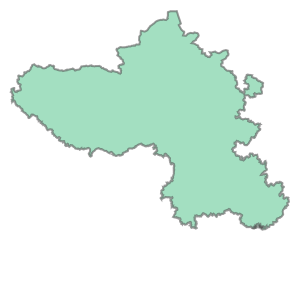

In [193]:
centroidX=China3415.centroid.x[0]
centroidY=China3415.centroid.y[0]

                     #l, r  #below, above
China_provinces3415.cx[:centroidX:,:centroidY].unary_union

<Axes: >

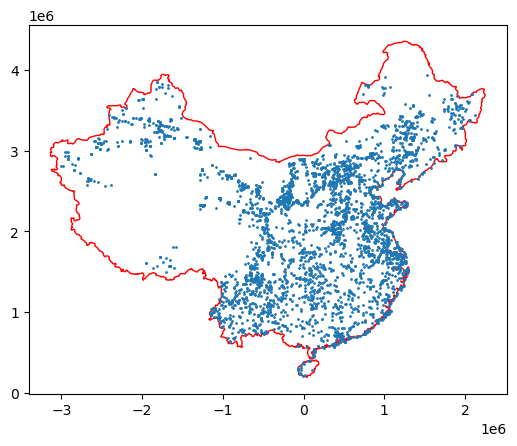

In [142]:
base = China3415.plot(color='white', edgecolor='red')
China_PowerPlants3415.plot(ax=base,markersize=1)